In [ ]:
# Enter your name(s) here
# Abbey Truong att837
# Ben Truong bst574
# Kamil Kalowski ktk582
# Zach Cramer zc5455

# Using Machine Learning to Predict Company Bankruptcy  

In this project we employ a variety of statistical methods in an effort to predict whether or not a company will go bankrupt. The data was collected from the Taiwann Economic Journal between 1999 and 2009. Bankruptcy was determined on metrics outlined by the business regulations of the Taiwan Stock Exchange.

Dataset: https://www.kaggle.com/datasets/fedesoriano/company-bankruptcy-prediction?resource=download

In [2]:
#You may add additional imports
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import statistics
import numpy as np
import sklearn as sk
from sklearn import model_selection, tree, metrics, naive_bayes, preprocessing, decomposition, neighbors, pipeline, svm
from scipy import stats
import matplotlib.pyplot as plt
import time

In [3]:
%matplotlib inline

# Data Cleaning 

We dropped any duplicate records in our data and imputed any missing values with the mean over the dataset in order to prepare our data for use in modeling.

In [4]:
# open file
data = pd.read_csv("data.csv")
# drop any duplicate records
data.drop_duplicates(inplace=True)
# fill in missing values with mean values
data.fillna(data.mean(), inplace=True)
# remove outliers 
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1
# filtered_entries = ~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)
# data = data[filtered_entries]
# print(data.shape)
(data.head(60))

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


# Reducing our features  

This dataset includes 96 features, many of which use the same metrics in different combinations. We want to cut out any features not important to predicting bankruptcy. We determine the best number of features (26) using a decision tree and take the top features.

In [24]:
# Use decision tree to determine the best number of features
from sklearn.model_selection import GridSearchCV
# features = data.iloc[:,1:96]
# labels = data.iloc[:, 0:1]
# labels = labels.values.ravel()

trainFeatures = []
trainLabels = []
testFeatures = []
testLabels = []
labels = []

trainFeatures, testFeatures, trainLabels, testLabels = sk.model_selection.train_test_split(data.iloc[:, 1:96], data.iloc[:, 0:1], train_size = 0.8, test_size = 0.2, random_state = 42)

labels = data.iloc[:, 0:1]
# we want to find which features are consistently the most important
bestParams = 0
cumulative_best_features = np.array([0.0 for i in range(95)])
for i in range(1):
    # decTreeTest = decTreeTest.fit(trainFeatures, trainLabels)

    Hyperparameters={'max_features':np.arange(1,95,5)}
    dectree= tree.DecisionTreeClassifier(random_state=42)
    cv_grid = GridSearchCV(estimator= dectree ,param_grid = Hyperparameters, 
                           scoring ='accuracy',cv = 5)
    cv_grid= cv_grid.fit(trainFeatures, trainLabels)
    bestParams = cv_grid
    print(cv_grid.best_params_)




{'max_features': 26}


In [25]:
featImport = cv_grid.best_estimator_.feature_importances_

best_max_features = cv_grid.best_params_['max_features']

cumulative_feature_importances = pd.DataFrame(cv_grid.best_estimator_.feature_importances_,
                                index = trainFeatures.columns,
                                columns = ['importance']).sort_values('importance', 
                                                                    ascending=False)
cumulative_feature_importances.head(best_max_features)

reduced_feature_names = cumulative_feature_importances.head(best_max_features).index.values
print(reduced_feature_names)

reduced_train_features = trainFeatures.loc[:,reduced_feature_names]
reduced_test_features = testFeatures.loc[:, reduced_feature_names]
reduced_train_features.head(10)

[' Per Share Net profit before tax (Yuan ¥)' ' Borrowing dependency'
 ' Quick Ratio' " Net Income to Stockholder's Equity"
 ' ROA(B) before interest and depreciation after tax'
 ' Net Income to Total Assets'
 ' Interest Coverage Ratio (Interest expense to EBIT)'
 ' Net Value Growth Rate' ' Operating Profit Rate'
 ' Net Value Per Share (C)' ' Working Capital/Equity'
 ' Degree of Financial Leverage (DFL)' ' Quick Asset Turnover Rate'
 ' Interest-bearing debt interest rate'
 ' Persistent EPS in the Last Four Seasons'
 ' Continuous Net Profit Growth Rate' ' Net Value Per Share (B)'
 ' Operating Expense Rate' ' Research and development expense rate'
 ' Working Capital to Total Assets' ' Allocation rate per person'
 ' Inventory Turnover Rate (times)' ' Cash/Current Liability'
 ' Cash/Total Assets' ' Accounts Receivable Turnover'
 ' Non-industry income and expenditure/revenue']


,Per Share Net profit before tax (Yuan ¥),Borrowing dependency,Quick Ratio,Net Income to Stockholder's Equity,ROA(B) before interest and depreciation after tax,Net Income to Total Assets,Interest Coverage Ratio (Interest expense to EBIT),Net Value Growth Rate,Operating Profit Rate,Net Value Per Share (C),...,Net Value Per Share (B),Operating Expense Rate,Research and development expense rate,Working Capital to Total Assets,Allocation rate per person,Inventory Turnover Rate (times),Cash/Current Liability,Cash/Total Assets,Accounts Receivable Turnover,Non-industry income and expenditure/revenue
3759,0.175943,0.378194,0.005780,0.840580,0.544622,0.801313,0.566658,0.000433,0.998986,0.197337,...,0.197337,7.000000e+09,2.700000e+09,0.785009,0.013654,1.119688e-04,0.002388,0.032719,0.000820,0.303528
1782,0.177299,0.374378,0.007728,0.841339,0.558863,0.810914,0.565395,0.000469,0.999027,0.173697,...,0.173697,1.938068e-04,1.353189e-04,0.871387,0.000664,5.870000e+09,0.007710,0.207601,0.000625,0.303508
5013,0.183776,0.373293,0.005343,0.840969,0.554687,0.809740,0.565484,0.000536,0.999094,0.225149,...,0.225149,2.028264e-04,1.005129e-04,0.774787,0.003322,7.850000e+09,0.005095,0.061019,0.000889,0.303514
5412,0.186563,0.379327,0.007319,0.841885,0.546764,0.810082,0.565820,0.000478,0.999004,0.180692,...,0.180692,3.280000e+08,0.000000e+00,0.828304,0.016025,3.349510e-04,0.000609,0.018261,0.000996,0.303490
3066,0.178203,0.372543,0.007495,0.840885,0.529150,0.804638,0.565848,0.000442,0.998975,0.194261,...,0.194261,1.021070e-04,0.000000e+00,0.799793,0.006717,2.407520e-04,0.000628,0.014452,0.000692,0.303551
3204,0.162537,0.374816,0.006751,0.838942,0.517426,0.781277,0.564066,0.000428,0.998853,0.180608,...,0.180608,1.425798e-04,7.740000e+09,0.768061,0.021589,1.580174e-04,0.003900,0.036013,0.000824,0.303411
2499,0.210891,0.371236,0.000147,0.843386,0.619573,0.857531,0.565194,0.000474,0.999650,0.219502,...,0.219502,1.085827e-04,0.000000e+00,0.716045,0.052490,1.910000e+07,0.000257,0.001967,0.015503,0.307626
3195,0.159072,0.372124,0.007264,0.838538,0.532523,0.771614,0.564712,0.000414,0.998945,0.185201,...,0.185201,1.021070e-04,1.560000e+08,0.774746,0.009346,2.959721e-04,0.006564,0.074751,0.000881,0.303255
4461,0.174060,0.370367,0.006545,0.840321,0.527384,0.799975,0.565744,0.000448,0.998982,0.219965,...,0.219965,9.840000e+09,3.750000e+09,0.785996,0.007819,1.855319e-04,0.007740,0.150690,0.001512,0.303514
3927,0.174964,0.369637,0.036499,0.840682,0.546121,0.808044,0.565159,0.000531,0.999045,0.178711,...,0.178711,1.739173e-04,1.334513e-04,0.931005,0.004441,1.278279e-04,0.037870,0.263469,0.000698,0.303543


### Data Exploration
We use a variety of visualization tools to identify trends and inform our decisions for future models.

Number of bankrupt companies: 220
Number of non-bankrupt companies: 6599


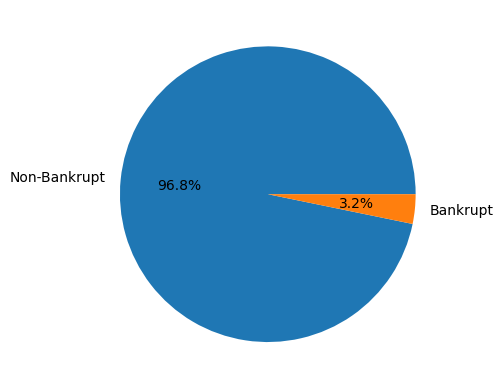

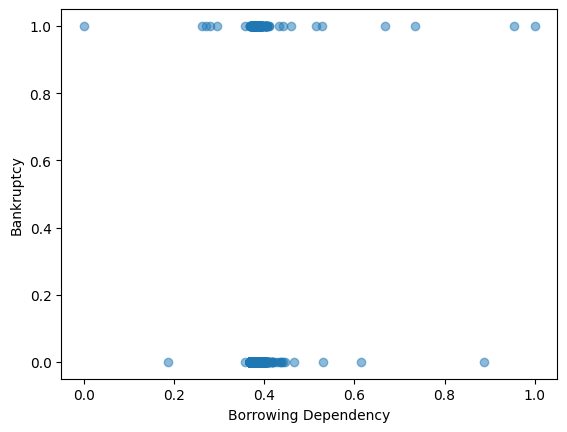

Total bankruptcies of companies with a borrowing dependency (BD) of greather than or equal to .4:  24 

Total bankruptcies of companies with a borrowing dependency (BD) of less than .4:  196 

Percentage of companies that go bankrupt with a BD of greather than or equal to .4:  0.3429 

Percentage of companies that go bankrupt with a BD of less than .4:  0.029 



In [7]:
import seaborn as sns
dataTest = data.copy(deep = True)

num_bankrupt = sum(data['Bankrupt?'])
num_nonBankrupt = len(labels) - num_bankrupt

print("Number of bankrupt companies:", num_bankrupt)
print("Number of non-bankrupt companies:", num_nonBankrupt)

denomination = 'Non-Bankrupt', 'Bankrupt'
sizes = [num_nonBankrupt, num_bankrupt]

#Pie
fig, ax = plt.subplots()
ax.pie(sizes, labels=denomination, autopct='%1.1f%%')

#Scatter
bdScatter = plt.figure("Borrowing Dependency & Bankruptcy")
plt.scatter(data[' Borrowing dependency'], data['Bankrupt?'], alpha=0.5)
plt.xlabel('Borrowing Dependency')
plt.ylabel('Bankruptcy')
plt.show()

#Stats
bdlt_bankruptcies = 0 #borrow dependency less than
bgt_bankruptcies = 0 #borrow dependency greater than
bdlt_total = 0
bgt_total = 0
for i in range(len(data)):
  if(data.iloc[i][' Borrowing dependency'] >= 0.4):
    bgt_total +=1
    if(data.iloc[i]['Bankrupt?'] == 1):
      bgt_bankruptcies += 1
  elif(data.iloc[i][' Borrowing dependency'] < 0.4):
    bdlt_total +=1
    if(data.iloc[i]['Bankrupt?'] == 1):
      bdlt_bankruptcies += 1
 
bgt_bankruptcies_pct = float(bgt_bankruptcies)/bgt_total
bdlt_bankruptcies_pct = float(bdlt_bankruptcies)/bdlt_total
bdlt_bankruptcies_pct = round(bdlt_bankruptcies_pct, 4)
bgt_bankruptcies_pct = round(bgt_bankruptcies_pct, 4)
print("Total bankruptcies of companies with a borrowing dependency (BD) of greather than or equal to .4: ", bgt_bankruptcies, "\n")
print("Total bankruptcies of companies with a borrowing dependency (BD) of less than .4: ",bdlt_bankruptcies, "\n")
print("Percentage of companies that go bankrupt with a BD of greather than or equal to .4: ", bgt_bankruptcies_pct, "\n")
print("Percentage of companies that go bankrupt with a BD of less than .4: ", bdlt_bankruptcies_pct, "\n")


# Separate the target variable (bankruptcy) from the features
feat = reduced_train_features[[' Borrowing dependency', ' Net Value Growth Rate']]



### More Data Exploration

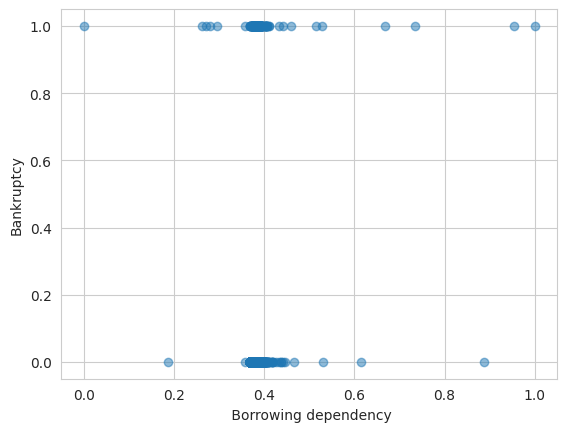

In [32]:
# scatter plot comparing Working Capital to Bankruptcy
LiaEquity = plt.figure("Borrowing dependency")
plt.scatter(data[reduced_feature_names][' Borrowing dependency'], data['Bankrupt?'], alpha = .5)
plt.xlabel(' Borrowing dependency')
plt.ylabel('Bankruptcy')
plt.show()

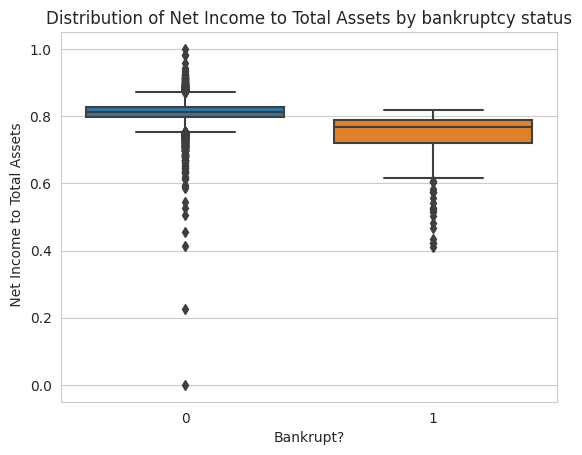

In [33]:
# box plot comparing Net Income to Total Assets
sns.boxplot(x='Bankrupt?', y=' Net Income to Total Assets', data=data)
sns.set_style("whitegrid")
plt.title('Distribution of Net Income to Total Assets by bankruptcy status')
plt.show()

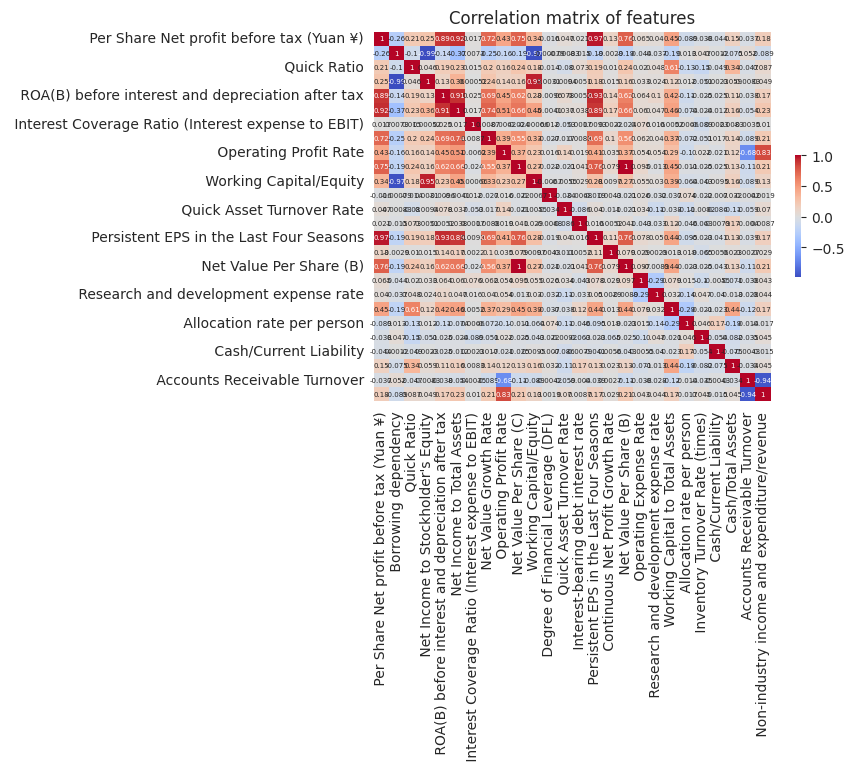

In [54]:
# correlation matrix
corr_matrix = data.loc[:,reduced_feature_names].head(450).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 5}, cbar_kws={"shrink": .33})
plt.title('Correlation matrix of features')
plt.show()

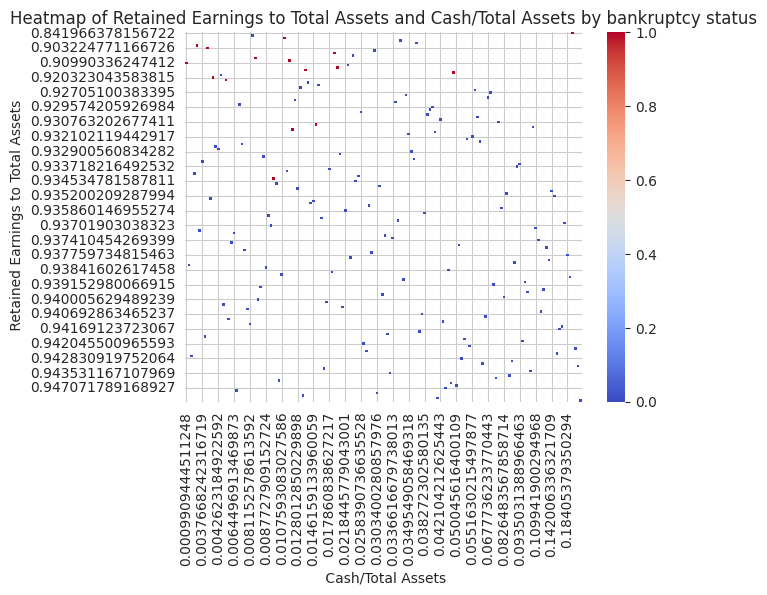

In [35]:
# heatmap
sns.heatmap(data.head(150).pivot_table(index=' Retained Earnings to Total Assets', columns=' Cash/Total Assets', values='Bankrupt?'), cmap='coolwarm')
plt.title('Heatmap of Retained Earnings to Total Assets and Cash/Total Assets by bankruptcy status')
plt.show()

### Data Exploration Insights
- 96.8% of companies are not bankrupt while 3.2% are
- The majority of companies, bankrupt or not, lie right around the 0.4 mark for borrowing dependency
- It was interesting that the net income to total assets ratio was much larger for companies that went bankrupt.

### K-Nearest Neighbors
KNN classifies data using the "votes" of the K-closest records by Euclidean distance.

In [ ]:
# K-Nearest Neighbors - 5 fold cross validation, 7 neighbors

scaler = preprocessing.StandardScaler()
pca = decomposition.PCA()
knn_clf = neighbors.KNeighborsClassifier(n_neighbors=7)
pipe = pipeline.Pipeline(steps=[('scaler', scaler), ('pca', pca), ('knn_classifier', knn_clf)])
accs = model_selection.cross_val_score(pipe, reduced_train_features, trainLabels, cv=5)

print(accs)
print("average accuracy: ", np.mean(accs))

[0.96975252 0.96883593 0.9715857  0.96608616 0.96608616]
average accuracy:  0.9684692942254813


In [ ]:
# Let's find the best hyperparameters for this model

param_grid = {
    'pca__n_components': list(range(1, 26)),
    'knn_classifier__n_neighbors': list(range(1, 25))
}

grid = model_selection.GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5
)
grid.fit(reduced_train_features, trainLabels)

print("best params: ", grid.best_params_)
print("best score: ", grid.best_score_)

best params:  {'knn_classifier__n_neighbors': 10, 'pca__n_components': 6}
best score:  0.9712190650779101


### Ensemble + Random Forests
Random Forests is an ensemble classifier that uses multiple, small decision trees ("stumps") to vote on a classification.



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

rfc = RandomForestClassifier()

param_grid = {'n_estimators': [50, 100, 150]}

grid_search = GridSearchCV(rfc, param_grid, cv = 5)
rfc_scores = cross_val_score(grid_search, reduced_train_features, trainLabels, cv = 5)


grid_search.fit(reduced_train_features, trainLabels)
print(classification_report(testLabels, grid_search.predict(reduced_test_features)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.82      0.18      0.29        51

    accuracy                           0.97      1364
   macro avg       0.89      0.59      0.64      1364
weighted avg       0.96      0.97      0.96      1364



### ADA Boost Classifier
In boosting, classifiers are trained sequentially and each time the sampling of the training set depends on the performance of previously generated models.




In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_classifier = AdaBoostClassifier()

param_grid = {'n_estimators': [50, 100, 150]}

grid_search = GridSearchCV(ada_boost_classifier, param_grid, cv=5)

abc_scores = cross_val_score(grid_search, reduced_train_features, trainLabels, cv=5)

grid_search.fit(reduced_train_features, trainLabels)
print(classification_report(testLabels, grid_search.predict(reduced_test_features)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1313
           1       0.58      0.41      0.48        51

    accuracy                           0.97      1364
   macro avg       0.78      0.70      0.73      1364
weighted avg       0.96      0.97      0.96      1364



### Decision Trees
Decision trees create splits at different features to further purify each group of data that passes through the split.

In [ ]:
# decision tree
decTree = sk.tree.DecisionTreeClassifier(criterion = "entropy")
# fit from features and labels
decTree = decTree.fit(reduced_train_features, trainLabels)
labelsPred = decTree.predict(reduced_test_features)
print("Accuracy:",sk.metrics.accuracy_score(testLabels, labelsPred))

# testing a few different criterions and max depths for various decision trees
decTreeT1 = sk.tree.DecisionTreeClassifier(criterion = "gini", max_depth = 15)
decTreeT1 = decTreeT1.fit(reduced_train_features, trainLabels)
labelsPred = decTreeT1.predict(reduced_test_features)
print("Accuracy:",sk.metrics.accuracy_score(testLabels, labelsPred))

decTreeT2 = sk.tree.DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
decTreeT2 = decTreeT2.fit(reduced_train_features, trainLabels)
labelsPred = decTreeT2.predict(reduced_test_features)
print("Accuracy:",sk.metrics.accuracy_score(testLabels, labelsPred))

decTreeT3 = sk.tree.DecisionTreeClassifier(criterion = "gini", max_depth=25)
decTreeT3 = decTreeT3.fit(reduced_train_features, trainLabels)
labelsPred = decTreeT3.predict(reduced_test_features)
print("Accuracy:",sk.metrics.accuracy_score(testLabels, labelsPred))

decTreeTest = sk.tree.DecisionTreeClassifier(criterion = "entropy")
decTreeTest = decTreeTest.fit(reduced_train_features, trainLabels)

# 5 fold cross validation test
scores = model_selection.cross_val_score(decTreeTest, reduced_train_features, trainLabels, cv =5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.9472140762463344
Accuracy: 0.9567448680351907
Accuracy: 0.9626099706744868
Accuracy: 0.9538123167155426
Accuracy: 0.96 (+/- 0.01)


##Conclusion
After evaluating our data on the most significant features with the following classifiers: Decsision Trees, KNN, Ensemble/Random Forests, and a Neural Net. We received similar accuracy ratings for each, falling around 96-97, with the best being KNN at 97.1%. Our models benefitted from feature engineering and data prep that resulted in quicker run times and greater accuracy. It should also be noted that our model may not be as applicable to companies world wide, as our data was sourced from Taiwan and is skewed toward Taiwanese companies. 